# Goodwin Model Simulation

In the following, we set up a basic Goodwin model, involving endogenous cycles created by class struggle. 
The mechanism is driven by the following:
- Increasing demand for labor leads to increased employment, which means fewer workers available
- Lower available labour-supply leads to excess demand and higher wages
- Higher wages drives profit down
- Lower profits forces firms/capital owners to lay off their workforce, decreasing employment, reducing wages
- Reduced wages will again increase the labor-demand.


**Status:**
We have tried setting up the model as stated by https://en.wikipedia.org/wiki/Goodwin_model_(economics), changing differential equations to their discrete counterpart, difference equations.

However, the model seems very susceptible to initial values, and the degree of the cycles tend to increase dramatically, leading to a breakdown for the given initial values and constants we have set - which are the ones creating an output closest to the wanted.
Current problems are:
- Employment can exceed 100% (we do not intend to include child labour)
- Wages as well as the labour share of income are often zero and can exceed one (we do not intend to include slave labour either)
- Cycles increase in size, leading to what looks like a revolution by the labour force taking all income, after which the model breaks down 

This is a work in progress. Sorry for bad structure, etc.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sympy import symbols, Eq, solve


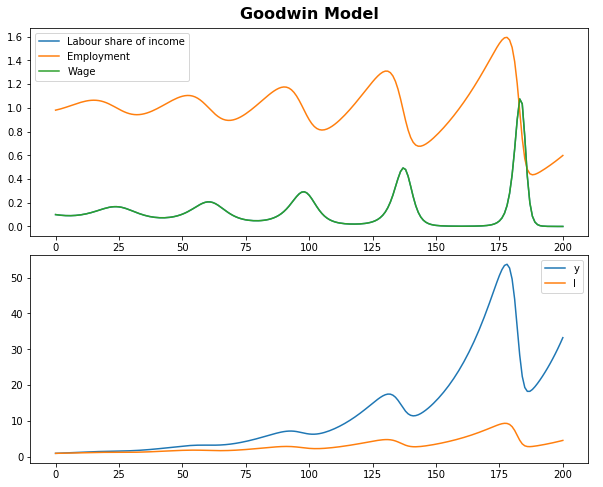

In [5]:
a = 1 #Productivity of labour
l = 1 #Size of employed labour force
k = 1 #Capital
sigma = 1 #Capital-Output ratio
beta = 0.01 #Population growth
alpha = 0.01 #Growth in productivity of labour
delta = 0.2 #Depreciation of capital
s= 0.25 #Savings rate
rho = 1 #Philips-constant
gamma = 1 #Constant, negatively correlated with growth in wages

#Size of simulation:
simstørrelse = 200

#Setting first values:
v_list = [0.98]
u_list = [0.1]
y_list = [a*l]
l_list = [l]
wage_list = [a*u_list[0]]

#Solving the model:
for i in range(0,simstørrelse):
    v_t1, u_t1 = symbols('v_t1 u_t1')
    eq1 = Eq(v_list[i]*((s*(1-u_list[i]))/sigma - alpha - beta - delta) + v_list[i] - v_t1)
    eq2 = Eq(u_list[i]*(rho*v_list[i] - gamma - alpha) + u_list[i] - u_t1)

    løsning = solve((eq1,eq2), (v_t1,u_t1))

#Pulling relevant metrics out in each iteration of the model-solving process:
    v_list.append(løsning[v_t1])
    u_list.append(løsning[u_t1])
    y_list.append((1+s*(1-løsning[u_t1])*(1/sigma)-delta)*y_list[i])
    l_list.append((1+s*(1-løsning[u_t1])*(1/sigma)-delta-alpha)*l_list[i])
    wage_list.append(a*løsning[u_t1])

#Setting up the figure:
fig = plt.figure(figsize=(10,8), frameon=False)
title_font = {'size':'16', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'}
plt.title('Goodwin Model',**title_font)
plt.axis('off')

ax = fig.add_subplot(4,1,(1,2))
plt.plot(u_list, label='Labour share of income')
plt.plot(v_list, label='Employment')
plt.plot(wage_list, label='Wage')
plt.legend()

#Second figure:
ax = fig.add_subplot(4,1,(3,4))
plt.plot(y_list, label='y')
plt.plot(l_list, label='l')
plt.legend()
